## Retrieve datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(37)

dataset_enc = pd.read_csv('numercialDataset.csv')
dataset_enc_s = pd.read_csv("numericalDatasetS.csv")

## Preparing input sample for all columns

In [2]:
# Preparing input sample for all columns
def sample_prep(dataset):
    inp = dataset
    inp = inp.drop('Insomnia', axis=1)
    inp = inp.drop('OCD', axis=1)
    inp = inp.drop('Depression', axis=1)
    inp = inp.drop('Mental health score', axis=1)
    inp = inp.drop('Anxiety', axis=1)

    # Preparing input sample for genre columns
    # inp = inp.drop('Age', axis=1)
    # inp = inp.drop('Hours per day', axis=1)
    # inp = inp.drop('BPM', axis=1)
    # inp = inp.drop('Primary streaming service', axis=1)
    # inp = inp.drop('Music effects', axis=1)
    return inp

# inp = sample_prep(dataset_enc)
inp = sample_prep(dataset_enc_s)
inp

,Age,Hours per day,BPM,Primary streaming service,Fav genre,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,-0.598806,0.159501,0.287691,0.400127,1.170684,0.882294,-1.364189,-0.889991,1.796538,-1.017024,...,2.250937,-0.715533,0.871586,0.699551,-1.171509,-1.214767,-0.362910,-1.040205,1.659300,1.469204
1,3.356381,-0.408280,-1.272932,1.109606,-0.726974,0.882294,0.695095,-0.889991,-0.997032,-0.023418,...,1.257581,2.712100,0.871586,-1.072445,-0.084202,0.649759,-1.308386,-2.004139,-1.181115,-0.541642
2,-0.598806,0.159501,-0.525134,0.400127,0.538131,-1.133409,-1.364189,-0.889991,-0.065842,-1.017024,...,2.250937,1.569556,0.871586,-1.072445,-0.084202,1.582022,1.528043,-2.004139,-0.234310,-0.541642
3,-0.598806,0.538022,-1.207906,0.400127,-0.726974,0.882294,-0.334547,1.259012,-0.997032,-1.017024,...,2.250937,0.427012,1.841103,-0.186447,1.003105,1.582022,1.528043,0.887663,-1.181115,-0.541642
4,-0.598806,-0.219019,-1.858165,1.109606,1.170684,0.882294,0.695095,-0.889991,-0.065842,0.970187,...,-0.729130,0.427012,-0.097931,-0.186447,-1.171509,-0.282504,-1.308386,-2.004139,0.712495,-0.541642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.690787,-0.597540,-0.102465,0.400127,0.959833,0.882294,1.724737,0.184510,-0.997032,0.970187,...,-0.729130,1.569556,-0.097931,-0.186447,1.003105,-1.214767,-0.362910,0.887663,-1.181115,-0.541642
590,-0.598806,-0.976060,1.198054,0.400127,0.327281,0.882294,-0.334547,0.184510,-0.997032,-1.017024,...,-0.729130,-0.715533,-0.097931,-1.072445,1.003105,-1.214767,-1.308386,-0.076271,0.712495,-0.541642
591,-0.506825,0.916542,-0.102465,-1.018831,0.748982,-1.133409,-0.334547,1.259012,0.865348,-0.023418,...,0.264226,0.427012,0.871586,-0.186447,-0.084202,0.649759,0.582566,-1.040205,-0.234310,-0.541642
592,-0.506825,0.538022,1.523183,0.400127,-1.992080,-1.133409,1.724737,-0.889991,-0.997032,-1.017024,...,-0.729130,-0.715533,-1.067448,-1.072445,-2.258816,-1.214767,-1.308386,-2.004139,0.712495,-0.541642


## Train model and test

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define x
X = inp

#'y' is target variable
y = dataset_enc_s['Mental health score']

pre_opt_regressor = RandomForestRegressor(random_state=37)


# Fitting Random Forest Regression to the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


pre_opt_regressor.fit(X_train, y_train)

# # Make predictions
y_pred = pre_opt_regressor.predict(X_test)

## Visualise the outcome accuracy (Pre Opt)

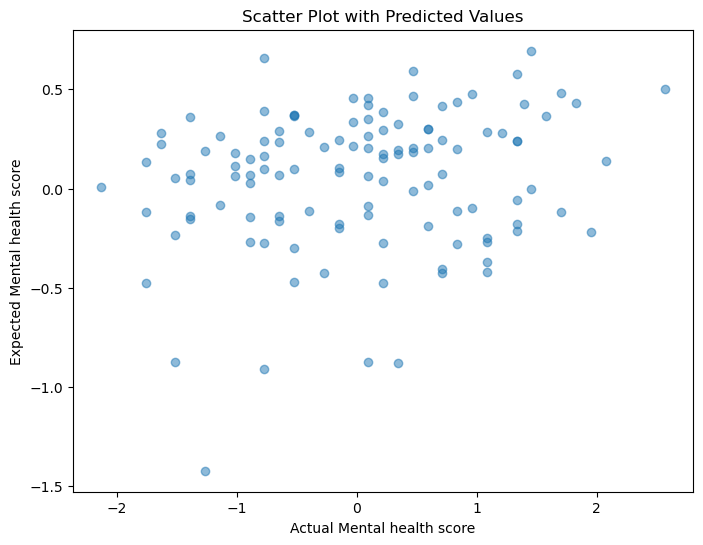

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

## Evaluate different accuracy measurements (Pre Opt)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.8177683685464805
Mean Squared Error (MSE): 0.9819510120241388
Root Mean Squared Error (RMSE): 0.9909344135835322
R-squared (R2): 0.012614584308609511


## Show model

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
# tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
# plt.figure(figsize=(50, 30))
# plot_tree(tree_to_plot, feature_names=dataset_enc.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree from Random Forest")
# plt.show()

## Hyperparameters imports

In [7]:
from sklearn.model_selection import GridSearchCV
import warnings
  
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


## Format the best hyperparameters print

In [8]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    best_params = results.best_params_
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in  zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
    return best_params

## Define parameters to try and fit

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

regressor = RandomForestRegressor(random_state=37)

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

best_parameters = print_results(grid_search)

BEST PARAMS: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

-0.966 (+/-0.241) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
-0.945 (+/-0.245) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-0.946 (+/-0.245) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
-0.944 (+/-0.244) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
-0.949 (+/-0.227) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
-0.941 (+/-0.252) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samp

In [10]:
hp_regressor = RandomForestRegressor(**best_parameters, random_state=37)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

hp_regressor.fit(X_train_val, y_train_val)
val_score = hp_regressor.score(X_val, y_val)
test_score = hp_regressor.score(X_test, y_test)

print("Validation Score:", val_score)
print("Test Score:", test_score)

# # Make predictions
y_pred = hp_regressor.predict(X_test)

Validation Score: 0.6454045224651836
Test Score: 0.041926898051520944


## Visualise the outcome accuracy (Post Hyp-Opt)

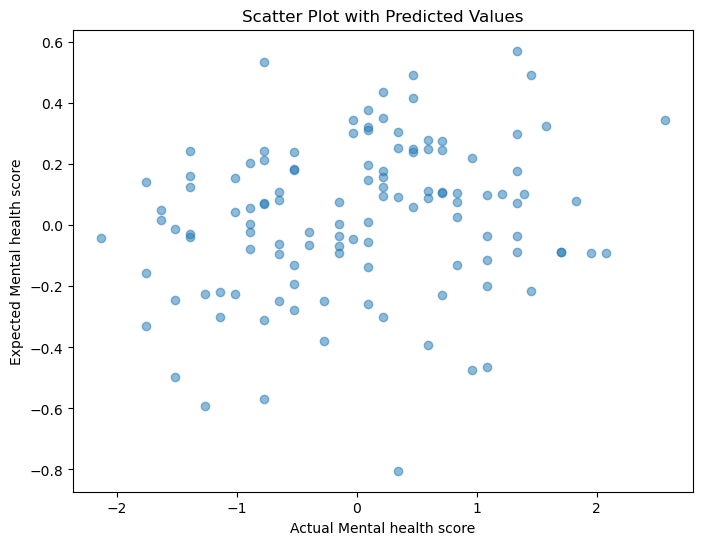

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

## Evaluate different accuracy measurements (Post Hyp-Opt)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.7923623706382441
Mean Squared Error (MSE): 0.9528000283381318
Root Mean Squared Error (RMSE): 0.9761147618687732
R-squared (R2): 0.041926898051520944


## Find the importance of each feature

In [13]:
importance = hp_regressor.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.12836
Feature: 1, Score: 0.08814
Feature: 2, Score: 0.09617
Feature: 3, Score: 0.03754
Feature: 4, Score: 0.05981
Feature: 5, Score: 0.01588
Feature: 6, Score: 0.02973
Feature: 7, Score: 0.02979
Feature: 8, Score: 0.04283
Feature: 9, Score: 0.04142
Feature: 10, Score: 0.02043
Feature: 11, Score: 0.03355
Feature: 12, Score: 0.03689
Feature: 13, Score: 0.02581
Feature: 14, Score: 0.03195
Feature: 15, Score: 0.03613
Feature: 16, Score: 0.04010
Feature: 17, Score: 0.04109
Feature: 18, Score: 0.02999
Feature: 19, Score: 0.03533
Feature: 20, Score: 0.03710
Feature: 21, Score: 0.03605
Feature: 22, Score: 0.02590


## View all X features

In [14]:
X

,Age,Hours per day,BPM,Primary streaming service,Fav genre,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,-0.598806,0.159501,0.287691,0.400127,1.170684,0.882294,-1.364189,-0.889991,1.796538,-1.017024,...,2.250937,-0.715533,0.871586,0.699551,-1.171509,-1.214767,-0.362910,-1.040205,1.659300,1.469204
1,3.356381,-0.408280,-1.272932,1.109606,-0.726974,0.882294,0.695095,-0.889991,-0.997032,-0.023418,...,1.257581,2.712100,0.871586,-1.072445,-0.084202,0.649759,-1.308386,-2.004139,-1.181115,-0.541642
2,-0.598806,0.159501,-0.525134,0.400127,0.538131,-1.133409,-1.364189,-0.889991,-0.065842,-1.017024,...,2.250937,1.569556,0.871586,-1.072445,-0.084202,1.582022,1.528043,-2.004139,-0.234310,-0.541642
3,-0.598806,0.538022,-1.207906,0.400127,-0.726974,0.882294,-0.334547,1.259012,-0.997032,-1.017024,...,2.250937,0.427012,1.841103,-0.186447,1.003105,1.582022,1.528043,0.887663,-1.181115,-0.541642
4,-0.598806,-0.219019,-1.858165,1.109606,1.170684,0.882294,0.695095,-0.889991,-0.065842,0.970187,...,-0.729130,0.427012,-0.097931,-0.186447,-1.171509,-0.282504,-1.308386,-2.004139,0.712495,-0.541642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.690787,-0.597540,-0.102465,0.400127,0.959833,0.882294,1.724737,0.184510,-0.997032,0.970187,...,-0.729130,1.569556,-0.097931,-0.186447,1.003105,-1.214767,-0.362910,0.887663,-1.181115,-0.541642
590,-0.598806,-0.976060,1.198054,0.400127,0.327281,0.882294,-0.334547,0.184510,-0.997032,-1.017024,...,-0.729130,-0.715533,-0.097931,-1.072445,1.003105,-1.214767,-1.308386,-0.076271,0.712495,-0.541642
591,-0.506825,0.916542,-0.102465,-1.018831,0.748982,-1.133409,-0.334547,1.259012,0.865348,-0.023418,...,0.264226,0.427012,0.871586,-0.186447,-0.084202,0.649759,0.582566,-1.040205,-0.234310,-0.541642
592,-0.506825,0.538022,1.523183,0.400127,-1.992080,-1.133409,1.724737,-0.889991,-0.997032,-1.017024,...,-0.729130,-0.715533,-1.067448,-1.072445,-2.258816,-1.214767,-1.308386,-2.004139,0.712495,-0.541642


## Visualise feature importance

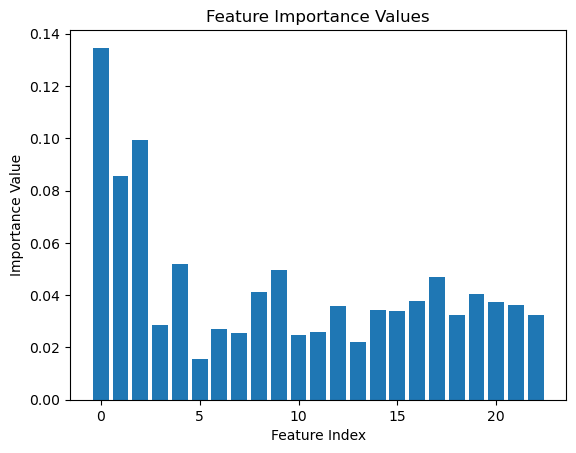

In [29]:
from matplotlib import pyplot

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature Index')
pyplot.ylabel('Importance Value')
pyplot.title('Feature Importance Values')
pyplot.show()

## Remove unimportant features

In [16]:
X = X.drop('Foreign languages', axis=1) #6
X = X.drop('Frequency [Gospel]', axis=1) #11
X = X.drop('Frequency [Classical]', axis=1) #7
X = X.drop('Frequency [Country]', axis=1) #8
X = X.drop('Frequency [Hip hop]', axis=1) #12
X = X.drop('Frequency [K pop]', axis=1) #14
X = X.drop('Music effects', axis=1) #23
X = X.drop('Frequency [R&B]', axis=1) #19
X

,Age,Hours per day,BPM,Primary streaming service,Fav genre,Frequency [EDM],Frequency [Folk],Frequency [Jazz],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,-0.598806,0.159501,0.287691,0.400127,1.170684,1.796538,-1.017024,-0.053954,-0.715533,0.871586,0.699551,-1.171509,-0.362910,-1.040205,1.659300
1,3.356381,-0.408280,-1.272932,1.109606,-0.726974,-0.997032,-0.023418,2.082626,2.712100,0.871586,-1.072445,-0.084202,-1.308386,-2.004139,-1.181115
2,-0.598806,0.159501,-0.525134,0.400127,0.538131,-0.065842,-1.017024,-1.122244,1.569556,0.871586,-1.072445,-0.084202,1.528043,-2.004139,-0.234310
3,-0.598806,0.538022,-1.207906,0.400127,-0.726974,-0.997032,-1.017024,2.082626,0.427012,1.841103,-0.186447,1.003105,1.528043,0.887663,-1.181115
4,-0.598806,-0.219019,-1.858165,1.109606,1.170684,-0.065842,0.970187,1.014336,0.427012,-0.097931,-0.186447,-1.171509,-1.308386,-2.004139,0.712495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.690787,-0.597540,-0.102465,0.400127,0.959833,-0.997032,0.970187,-0.053954,1.569556,-0.097931,-0.186447,1.003105,-0.362910,0.887663,-1.181115
590,-0.598806,-0.976060,1.198054,0.400127,0.327281,-0.997032,-1.017024,-0.053954,-0.715533,-0.097931,-1.072445,1.003105,-1.308386,-0.076271,0.712495
591,-0.506825,0.916542,-0.102465,-1.018831,0.748982,0.865348,-0.023418,-0.053954,0.427012,0.871586,-0.186447,-0.084202,0.582566,-1.040205,-0.234310
592,-0.506825,0.538022,1.523183,0.400127,-1.992080,-0.997032,-1.017024,-0.053954,-0.715533,-1.067448,-1.072445,-2.258816,-1.308386,-2.004139,0.712495


## Create a new model

In [17]:
#'y' is target variable
y = dataset_enc['Mental health score']

feature_imp_regressor = RandomForestRegressor(random_state=58)


# Fitting Random Forest Regression to the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


feature_imp_regressor.fit(X_train, y_train)

# # Make predictions
y_pred = feature_imp_regressor.predict(X_test)

## View accuracy (Post feature removals, Pre Hyp-Opt)

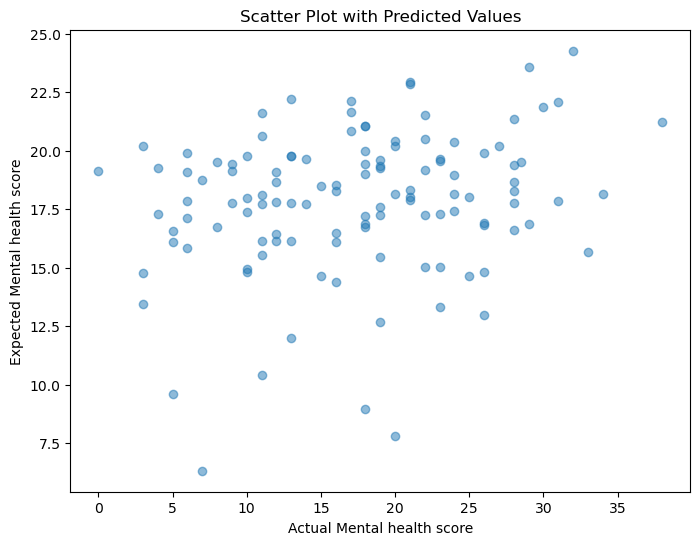

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6.588571428571427
Mean Squared Error (MSE): 63.41459873949581
Root Mean Squared Error (RMSE): 7.9633283706937394
R-squared (R2): 0.025748230670546768


## Find optimal hyperparameters for feature removed model

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

f_regressor = RandomForestRegressor(random_state=58)

grid_search = GridSearchCV(f_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

best_parameters = print_results(grid_search)

BEST PARAMS: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}

-62.422 (+/-15.058) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
-61.476 (+/-14.878) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-61.346 (+/-13.261) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
-60.873 (+/-13.753) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
-61.042 (+/-13.698) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
-61.615 (+/-13.353) for {'bootstrap': True, 'max_depth': None, 'max_features': 'sqr

## Train a model with best parameters and evaluate validation score

In [21]:
hp_feature_regressor = RandomForestRegressor(**best_parameters, random_state=30)
y_train = pd.DataFrame(y_train) 
y_val = pd.DataFrame(y_val)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

hp_feature_regressor.fit(X_train_val, y_train_val)
val_score = hp_feature_regressor.score(X_val, y_val)
test_score = hp_feature_regressor.score(X_test, y_test)

print("Validation Score:", val_score)
print("Test Score:", test_score)

# # Make predictions
y_pred = hp_feature_regressor.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation Score: 0.49418941333957433
Test Score: 0.055644866398827486


## View accuracy (Post feature removals, Post Hyp-Opt)

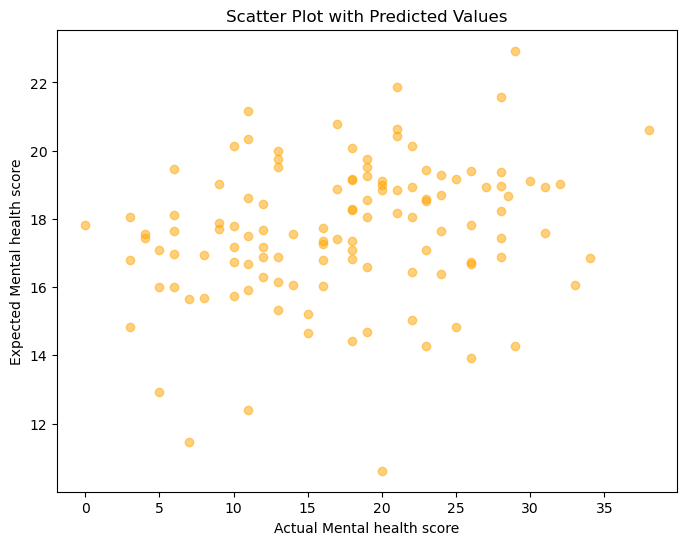

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6.368316591999006
Mean Squared Error (MSE): 61.46860980926818
Root Mean Squared Error (RMSE): 7.840191949771905
R-squared (R2): 0.055644866398827486
